## Compute Morse Graph without surrogate modeling

In [1]:
import CMGDB
import dytop.Grid as Grid
import dytop.CMGDB_util as CMGDB_util

import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Define map f
def f(x):
    x0 = x[:,0].reshape(-1,1)
    x1 = x[:,1].reshape(-1,1)
#     return [x[:,0] / (2.0 - x[:,0]), x[:,1] / (2.0 - x[:,1])]
    return np.concatenate((x0 / (2.0 - x0), x1 / (2.0 - x1)), axis=1)

In [3]:
# Bounds
lower_bounds = [0.0, 0.0]
upper_bounds = [1.0, 1.0]

sb = subdiv_init = subdiv_min = subdiv_max = 2  # for uniform grid
subdiv_limit = 10000

In [4]:
#sampling 
MG_util = CMGDB_util.CMGDB_util()

num_pts = 2 ** (sb + 2)

data = MG_util.sample_points(lower_bounds, upper_bounds, num_pts)

In [5]:
data.shape

(16, 2)

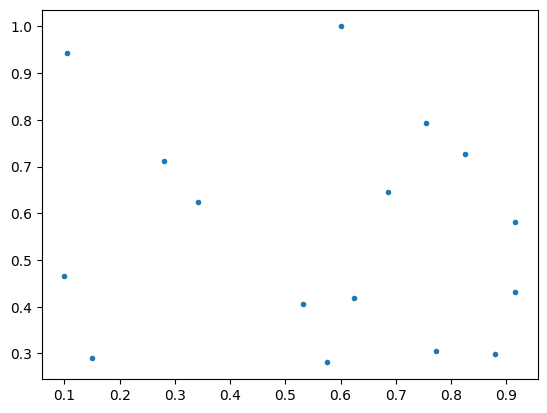

In [6]:
plt.scatter(data[:,0], data[:,1], marker='.')
plt.show()

In [7]:
data_y = f(data)

In [8]:
data_y.shape

(16, 2)

In [9]:
data = np.concatenate((data,data_y),axis=1)
data.shape

(16, 4)

In [10]:
data

array([[0.09963562, 0.465036  , 0.05242975, 0.30296216],
       [0.57462931, 0.28070418, 0.40314377, 0.16326695],
       [0.1050768 , 0.9419566 , 0.05545174, 0.89028163],
       [0.91542919, 0.43125228, 0.84404742, 0.27490225],
       [0.34152984, 0.62351416, 0.20593065, 0.45297535],
       [0.62453598, 0.41944925, 0.45405476, 0.2653817 ],
       [0.75467153, 0.79306352, 0.60600199, 0.65708804],
       [0.82516708, 0.72628239, 0.70236973, 0.57020675],
       [0.88013974, 0.2993136 , 0.78593711, 0.17599577],
       [0.91624973, 0.58222602, 0.8454436 , 0.41066209],
       [0.15003569, 0.290878  , 0.08110194, 0.17019148],
       [0.53152304, 0.40645175, 0.36195531, 0.25506083],
       [0.68674375, 0.64564621, 0.52293203, 0.47671902],
       [0.28010466, 0.71286715, 0.16286146, 0.55384116],
       [0.77373243, 0.30520843, 0.63096542, 0.18008612],
       [0.60050159, 0.99963657, 0.42908344, 0.99927341]])

In [11]:
subdivision = sb
grid = Grid.Grid(lower_bounds, upper_bounds, sb)

id2image = grid.id2image(data)

In [12]:
count = 0
for i in id2image:
    if len(i) == 0:
        count += 1
count

0

In [13]:
len(id2image)

4

In [14]:
id2image[0]

[array([0.05242975, 0.30296216]), array([0.08110194, 0.17019148])]

In [15]:
# Define box map for f
K=[0,0]
def F(rect):
    return MG_util.F_data(rect, id2image, grid.point2cell, K)

In [16]:
F([0, 0, 0.5, 0.5])

[0.05242974729094629,
 0.17019148005459675,
 0.08110193652245,
 0.3029621562115573]

In [17]:
np.amin([np.array([0.07989949, 0.27198215]), np.array([0.25487503, 0.09618782]), np.array([0.06908567, 0.01475932]), np.array([0.32477001, 0.06679934])], axis=0)

array([0.06908567, 0.01475932])

In [18]:
model = CMGDB.Model(subdiv_min, subdiv_max, subdiv_init, subdiv_limit,
                    lower_bounds, upper_bounds, F)

In [19]:
%%time
morse_graph, map_graph = CMGDB.ComputeMorseGraph(model)

Compute_Morse_Graph. Initializing root MorseDecomposition
Compute_Morse_Graph. A phase_space -> size () == 4
CPU times: user 2.02 ms, sys: 2.05 ms, total: 4.07 ms
Wall time: 3.5 ms
Compute_Morse_Graph. B phase_space -> size () == 4
Total Grid Memory (can be external) = 526
Max Memory For Single Grid (must be internal)= 526
Max SCC Random Access memory use (must be internal)= 34
Max SCC stack memory use (can be external memory) = 24
 ---- SUMMARY ---- 
Internal Memory Requirement = 560
External Memory Requirement = 550
Max graph memory size (never stored, however) = 104


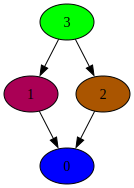

In [20]:
CMGDB.PlotMorseGraph(morse_graph)

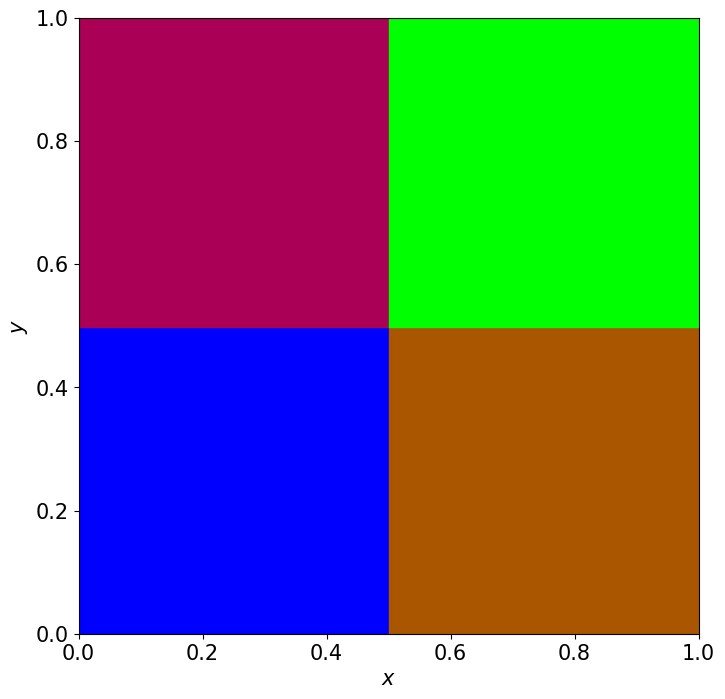

In [21]:
CMGDB.PlotMorseSets(morse_graph)

## Leslie map example

In [22]:
import math

# Define Leslie map
def f(x):
    th1 = 19.6
    th2 = 23.68
    x0 = x[:,0].reshape(-1,1)
    x1 = x[:,1].reshape(-1,1)
    return np.concatenate(((th1 * x0 + th2 * x1) * np.exp (-0.1 * (x0 + x1)), 0.7 * x0), axis=1)

In [23]:
# Bounds
lower_bounds = [-0.001, -0.001]
upper_bounds = [90.0, 70.0]

sb = subdiv_init = subdiv_min = subdiv_max = 14  # for uniform grid
subdiv_limit = 10000

In [24]:
#sampling 
MG_util = CMGDB_util.CMGDB_util()

num_pts = 2 ** (sb+1) 

data = MG_util.sample_points(lower_bounds, upper_bounds, num_pts)

In [25]:
data.shape

(32768, 2)

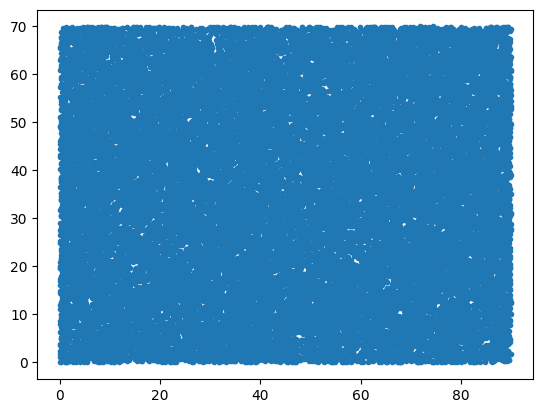

In [26]:
plt.scatter(data[:,0], data[:,1], marker='.')
plt.show()

In [27]:
data_y = f(data)

In [28]:
data_y[0]

array([3.86335951e-02, 5.35722500e+01])

In [29]:
data_y.shape

(32768, 2)

In [30]:
data = np.concatenate((data,data_y),axis=1)
data.shape

(32768, 4)

In [31]:
subdivision = sb
grid = Grid.Grid(lower_bounds, upper_bounds, subdivision)

id2image = grid.id2image(data)

In [32]:
count = 0
for i in id2image:
    if len(i) == 0:
        count += 1
count

2247

In [33]:
# Define box map for f
K=[1/2]*2
def F(rect):
    return MG_util.F_data(rect, id2image, grid.point2cell, K)

In [34]:
model = CMGDB.Model(subdiv_min, subdiv_max, subdiv_init, subdiv_limit,
                    lower_bounds, upper_bounds, F)

In [35]:
%%time
morse_graph, map_graph = CMGDB.ComputeMorseGraph(model)

Compute_Morse_Graph. Initializing root MorseDecomposition
Compute_Morse_Graph. A phase_space -> size () == 16384
CPU times: user 1.47 s, sys: 42.2 ms, total: 1.52 sCompute_Morse_Graph. B phase_space -> size () == 16384
Total Grid Memory (can be external) = 1245932
Max Memory For Single Grid (must be internal)= 1245406
Max SCC Random Access memory use (must be internal)= 139264
Max SCC stack memory use (can be external memory) = 46760
 ---- SUMMARY ---- 
Internal Memory Requirement = 1384670
External Memory Requirement = 1292692
Max graph memory size (never stored, however) = 577072

Wall time: 1.69 s


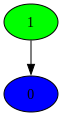

In [36]:
CMGDB.PlotMorseGraph(morse_graph)

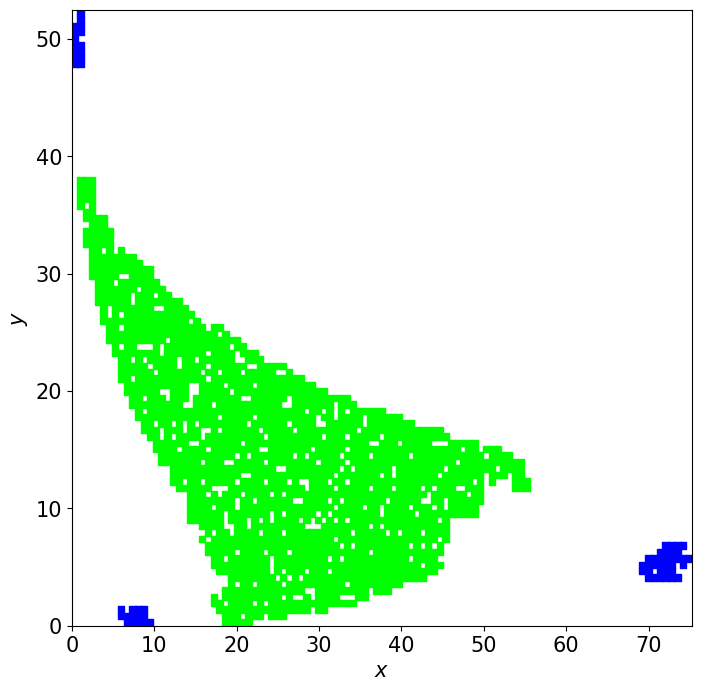

In [37]:
CMGDB.PlotMorseSets(morse_graph)

### Plot Region of Attraction

In [39]:
import dytop.RoA as RoA

roa = RoA.RoA(map_graph, morse_graph)

dictionary with volume of all Morse tiles = {1: 3197.761875507785, 0: 2199.903281599042}


(<Figure size 800x800 with 1 Axes>, <Axes: xlabel='0', ylabel='1'>)

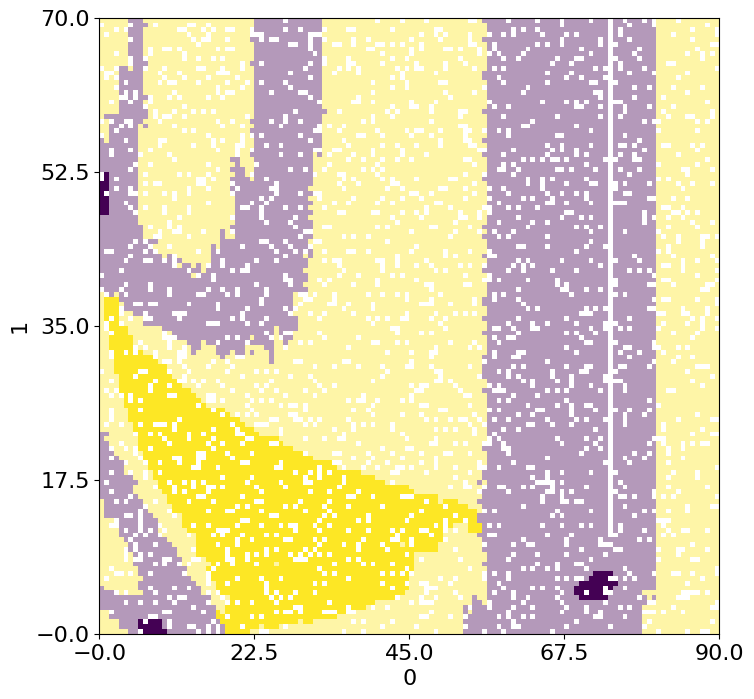

In [42]:
roa.PlotRoA()